## PYTORCH WORKFLOW

In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating",
    5: "saving and loading a model",
    6: "putting all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating',
 5: 'saving and loading a model',
 6: 'putting all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks
import matplotlib.pyplot as plt

torch.__version__

'1.13.1'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any king
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, create some *known* data using the linear regression formular.
We'll use a linear regression formula to make a straight line with known parameters.

In [3]:
# create *knwon * parameters
weight =.7
bias = .3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X.shape,y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [4]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

In [5]:
def plot_predictions(
        train_data = X_train,
        train_labels = y_train,
        test_data = X_test,
        test_labels = y_test,
        predictions = None):
    plt.figure(figsize = (10,7))

    # plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

    # plot test data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    # show the legend
    plt.legend(prop = {"size":14})

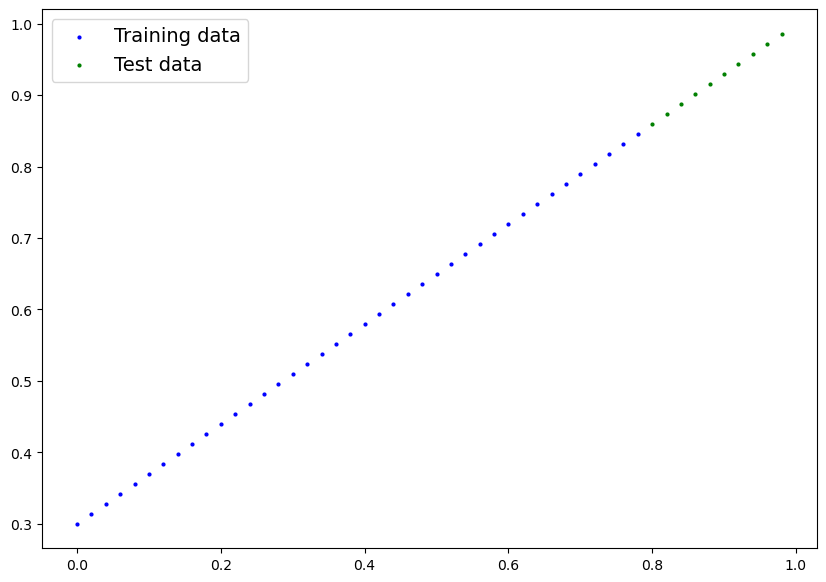

In [6]:
plot_predictions()

## 2. Build model


Because we're going to be building classes throughout the course, recommended to getting familiar
OOP in python, following resource from Real Python: 
https://realpython.com/python3-object-oriented-programming/



In [7]:
# Create linear regression Model class

class LinearRegressionModel(nn.Module): # <- almost everything in pytorch building block
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1,requires_grad=True,dtype=torch.float)
        )
        self.bias = nn.Parameter(
            torch.randn(1,requires_grad=True,dtype = torch.float)
        )



    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

##### What our model does?
* Start with random values (weights and bias)
* Look at training data and adjust the random values to better represent the ideal values


How does it do so?

Through 2 main algorithm:

1. gradient descent
2. backprogation

### pytorch model building essentials


* torch.nn : Contains all of the buildings for computational graphs( a neural network can be considered as computational graph)

* torch.nn.Parameter - what parameters should our model try and learn,  often a pytorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this where the optimizers in pytorch live, they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(),

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()


# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [10]:
# List named parameters

print(model_0.state_dict())
weight,bias


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

In [11]:
# Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds,sep='\n')
print(y_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


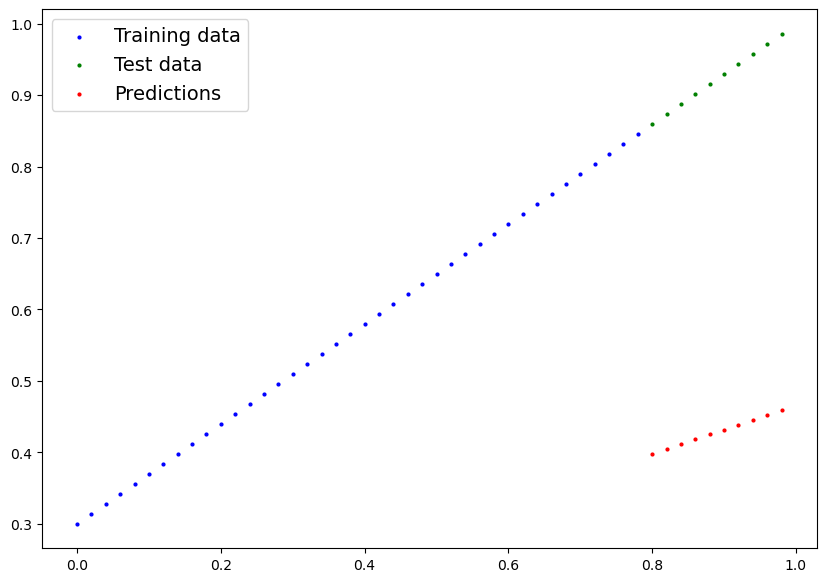

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters 
 to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to using loss functions

* Note : Loss function may also be called cost function or criterion in different areas. 
For our case, we're going to refer to it as a loss function.


Things we need to train:


* **Loss function:** A function to measure how wrong your prediction are to the ideal outputs,
lower is better.

* **Optimizer** : Takes into account the loss of a model and adjusts the model's parameters


And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [13]:
# setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer(SGD)

optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.01
)





### Building a training loop in pytorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass(this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate thhe loss
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of parameters of our model with respect to the loss (**backpropagations**)
5. Optimizer step - use the optimizer to adjus our model's parameters to try and imporve the loss (**gradient descent**)

In [14]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# An epoch is one loop through the data

epochs = 100

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []


# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred,y_train)
    #print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer(perform gradient descent)
    optimizer.step()

    ### testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test.type(torch.float))


    # monitering
    if(epoch%10==0):
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss : {test_loss}")

        print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

Text(0.5, 1.0, 'Training and Test loss curves')

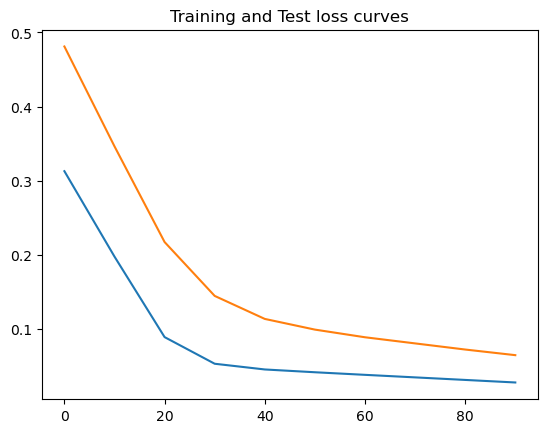

In [17]:
#plot the loss curves
plt.plot(epoch_count,train_loss_values,label = "Train loss")
plt.plot(epoch_count,test_loss_values,label = "Test loss")
plt.title("Training and Test loss curves")

In [18]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

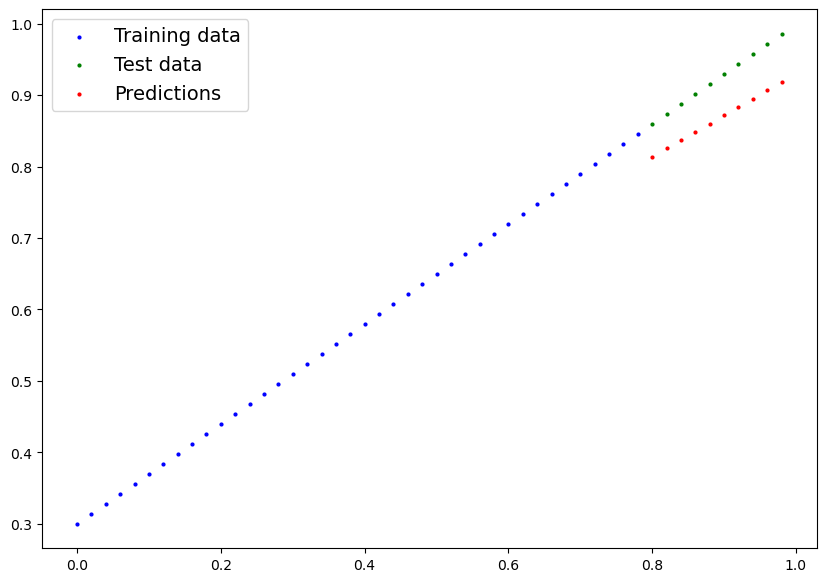

In [19]:
plot_predictions(predictions=y_preds_new)

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

## Saving a model in pytorch
There are three main methods you should know about for saving and loading models in pytorch.

1. `torch.save` - allows you save a pytorch object in python's pickle format
2. `torch.load()` - allows you load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [21]:
# Saving our pytorch model

from pathlib import Path


# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3. Save the model state dict

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH) 

Saving model to : models\01_pytorch_workflow_model.pth


## Loading a pytorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and  `state_dict()` into that.




In [22]:

# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f =MODEL_SAVE_PATH))




<All keys matched successfully>

In [23]:
# Make some predictions with our loaded model

loaded_model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
    loaded_model_preds = loaded_model_0(X_test)


loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [24]:
# Compare loaded model preds with original model preds


y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it.

In [37]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"device: {device}")

device: cuda


In [62]:
# Create some data using the linear regression y = wx + b

weight =.7
bias = .3


# create range values
start =0
end =1
step = 0.02

# Create X and y

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

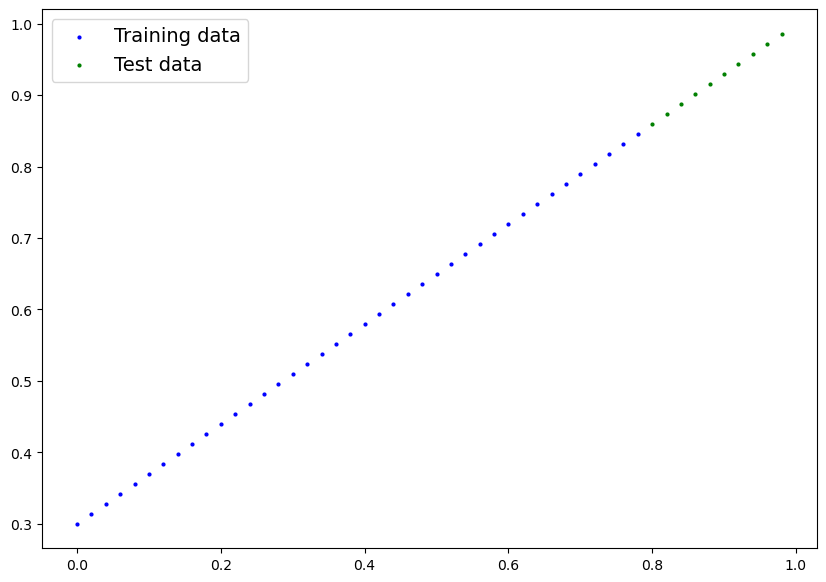

In [63]:
# split data

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split],y[:train_split]

X_test, y_test = X[train_split:],y[train_split:]

plot_predictions(X_train,y_train,X_test,y_test)
X_train

In [64]:
# Create a linear model by subclassing nn.Module


class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__() 
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
  


# set the manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [65]:
# set the model to use the target device


model_1.to(device)


next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:

* Loss functon
* Optimizer
* Training loop
* Testing loop




In [66]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [67]:
# setup loss function

loss_fn = nn.L1Loss()

# setup optimizer

optimizer = torch.optim.SGD( params = model_1.parameters(),
    lr = 0.01)


In [68]:
X_train

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

In [69]:
# Let's write a training loop

torch.manual_seed(42)

epochs = 200


# Put data on the target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)



for epoch in range(epochs):
    model_1.train()


    # 1. Forward pass

    y_pred = model_1(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_pred,y_train)

    # 3. Optimzer zero grad
    optimizer.zero_grad()

    # 4. perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred,y_test)


    if epoch%10==0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [70]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predictions



In [77]:
# turn model into evaluation mode

model_1.eval()

# make predictions



with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

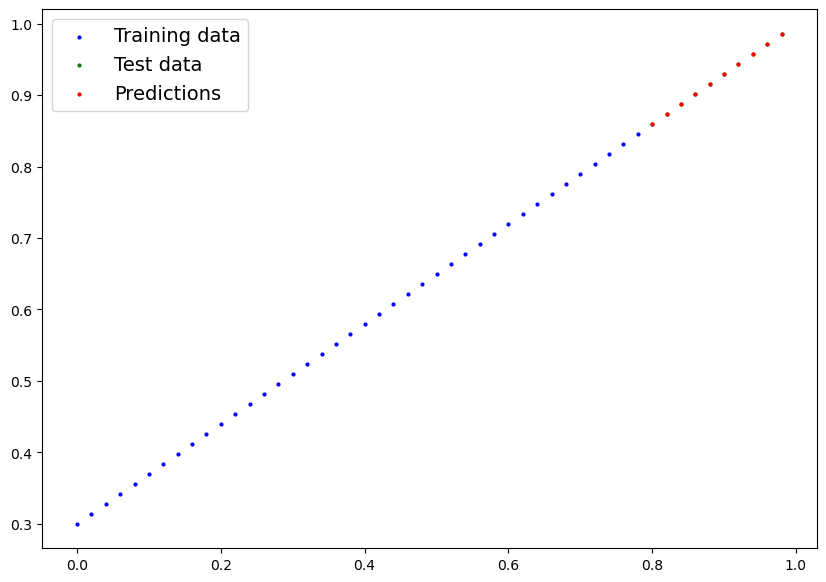

In [78]:

plot_predictions(predictions=y_preds.cpu())

### 6.5 saving and loading a trained model

In [85]:
from pathlib import Path

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH


# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_1.pth


In [86]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [88]:
# load a pytorch model

# create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()


# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [89]:
next(loaded_model_1.parameters()).device

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [90]:
# evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')